# **EFG Customer Churn Prediction**

# Data Exploration

In this initial phase of our churn prediction project, we will conduct a thorough exploration of our datasets. Our focus will be on understanding the data structure, identifying key variables, and gaining insights before any computational analysis begins.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
import pandas as pd

clients_df = pd.read_csv('/content/clients_data_competition.csv')
orders_df = pd.read_csv('/content/orders_data_competition.csv')

Exploring the Clients data

In [4]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Client ID             13523 non-null  int64  
 1   Account ID            13523 non-null  int64  
 2   Gender                13523 non-null  object 
 3   Risk Rate             13523 non-null  object 
 4   Company Name          13523 non-null  object 
 5   Is Closed             13523 non-null  int64  
 6   Is Dormant            13523 non-null  float64
 7   Is Profile Suspended  13523 non-null  int64  
 8   Is Client Suspended   13523 non-null  int64  
 9   Client Type Name      13523 non-null  object 
 10  OpenDate              13523 non-null  object 
 11  BirthDate             13523 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
clients_df['Company Name'].value_counts()

Company Name
HSB                                     11817
EHISB                                     584
OLT INVESTMENT INTERNATIONAL COMPANY      418
EFG HERMES-UAE                            386
EFG Hermes SP Limited                     226
EFG Oman                                   69
IFA                                         8
Jordan                                      6
EFG-HERMES MENA                             5
EFG-Hermes UAE LTD                          3
KSA                                         1
Name: count, dtype: int64

In [ ]:
clients_df['Client Type Name'].value_counts()

Client Type Name
Individuals    12773
Companies        750
Name: count, dtype: int64

In [ ]:
clients_df['Risk Rate'].value_counts()

Risk Rate
Low             8431
Not Assigned    3225
Medium          1559
High             308
Name: count, dtype: int64

In [ ]:
clients_df['Gender'].value_counts()

Gender
Male      10107
Female     3416
Name: count, dtype: int64

In [ ]:
clients_df.isna().sum()

Client ID               0
Account ID              0
Gender                  0
Risk Rate               0
Company Name            0
Is Closed               0
Is Dormant              0
Is Profile Suspended    0
Is Client Suspended     0
Client Type Name        0
OpenDate                0
BirthDate               0
dtype: int64

In [ ]:
clients_df.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate
0,0,0,Male,Low,HSB,0,0.0,0,0,Individuals,2/16/2014,1990-07-27
1,1,1,Female,Low,HSB,0,-1.0,1,0,Individuals,2/16/2014,1963-10-22
2,2,2,Male,Low,HSB,0,0.0,0,0,Individuals,2/17/2014,1971-05-14
3,3,3,Male,Low,HSB,0,0.0,0,0,Individuals,2/17/2014,1953-01-14
4,4,4,Male,Low,HSB,0,0.0,0,0,Individuals,2/17/2014,1976-06-09


Exploring the Orders data

In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987943 entries, 0 to 1987942
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Order ID           int64  
 1   Account ID         int64  
 2   Market Key         object 
 3   Security ID        int64  
 4   Order Type         object 
 5   Order Time         object 
 6   Order Via          object 
 7   Is Completed       int64  
 8   Is Canceled        int64  
 9   Expire Date        object 
 10  Execution Status   object 
 11  quantity           int64  
 12  Price              float64
 13  Sector Name        object 
 14  Executed Quantity  int64  
 15  Quantity           int64  
dtypes: float64(1), int64(8), object(7)
memory usage: 242.7+ MB


In [ ]:
orders_df["Market Key"].value_counts() #Only Egypt will drop

Market Key
Egypt    1987943
Name: count, dtype: int64

In [ ]:
orders_df["Order Type"].value_counts()

Order Type
Sell    1032087
Buy      955856
Name: count, dtype: int64

In [ ]:
orders_df["Order Via"].value_counts()

Online 1838591
Telephone 121828
Call Center 25676
Email 1848
Name: Order Via, dtype: int64

In [ ]:
orders_df["Execution Status"].value_counts()

Executed 1099919
Not Executed 870302
Partially Executed 17721
Name: Execution Status, dtype: int64

In [ ]:
orders_df['Sector Name'].value_counts()

Sector Name
Financials                    505126
Industries                    372582
Real Estate                   186742
Materials                     176610
INDUSTRIAL                    135995
Information Technology        120681
Health Care                    97810
Consumer Staples               95615
Consumer Discretionary         90378
INVESTMENT                     66757
FOOD                           25337
REAL ESTATE                    23834
Telecommunication Services     15822
Others                         15073
SERVICES                       14763
Energy                         14757
Basic Materials                13188
Telecommunications              9862
Tourism                         3660
Consumer Services               2808
Utilities                        540
Trade                              2
Pharmaceutical Industries          1
Name: count, dtype: int64

In [10]:
orders_df.isna().sum()

Order ID             0
Account ID           0
Market Key           0
Security ID          0
Order Type           0
Order Time           0
Order Via            0
Is Completed         0
Is Canceled          0
Expire Date          6
Execution Status     1
quantity             0
Price                0
Sector Name          0
Executed Quantity    0
Quantity             0
dtype: int64

#  Data Preprocessing

This part features a comprehensive data preprocessing pipeline designed to enhance data quality and prepare it for predictive modeling. It includes steps such as aggregating transactional data, calculating RFM (Recency, Frequency, Monetary) scores, appending last order dates, and applying categorical encoding, ensuring robust feature engineering for accurate model training.

In [61]:
# import Preprocessing.py that contains my functions
import preprocessing as pp
process = pp.preprocess_data(orders_df , clients_df , 4, 1)
process.info()

Number of unique clients in train data: 6127
Number of unique clients in test data: 2626


/content/preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_datetime(data[col])
/content/preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_datetime(data[col])
/content/preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Client ID            5827 non-null   int64         
 1   Order Type           5827 non-null   float64       
 2   Order Time           5827 non-null   datetime64[ns]
 3   Order Via            5827 non-null   int64         
 4   Is Completed         5827 non-null   float64       
 5   Is Canceled          5827 non-null   float64       
 6   Price                5827 non-null   float64       
 7   Sector Name          5827 non-null   int64         
 8   Executed Quantity    5827 non-null   int64         
 9   Gender               5827 non-null   int64         
 10  Risk Rate            5827 non-null   int64         
 11  Is Closed            5827 non-null   float64       
 12  Is Dormant           5827 non-null   float64       
 13  Is Client Suspended  5827 non-nul

In [62]:
process['Churn'].value_counts(normalize=True)

Churn
0    0.629827
1    0.370173
Name: proportion, dtype: float64

In [63]:
process.head()

,Client ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Price,Sector Name,Executed Quantity,Gender,...,Is Dormant,Is Client Suspended,OpenDate,BirthDate,last order date,orders count,Churn,RecencyScore,FrequencyScore,MonetaryScore
0,0,0.000000,2022-10-19 12:24:04,0,1.0,0.0,2.420,0,12000,1,...,0.0,0.0,2014-02-16,1990-07-27,2022-10-19 12:24:04,2,1,3,0,0
1,1,1.000000,2022-09-14 12:56:56,3,1.0,0.0,12.715,9,4347,0,...,1.0,0.0,2014-02-16,1963-10-22,2022-09-14 12:56:56,6,1,3,1,0
2,2,0.176471,2024-02-28 11:06:33,2,1.0,0.0,143.336,9,123895,1,...,0.0,0.0,2014-02-17,1971-05-14,2024-02-28 11:06:33,17,0,1,2,1
3,3,0.468750,2024-03-10 12:32:34,2,1.0,0.0,4717.780,5,682538,1,...,0.0,0.0,2014-02-17,1953-01-14,2024-03-10 12:32:34,64,0,0,3,2
4,4,0.692308,2024-02-26 12:47:33,2,1.0,0.0,14.844,5,403500,1,...,0.0,0.0,2014-02-17,1976-06-09,2024-02-26 12:47:33,13,0,1,2,1


# EDA

In this section, we conduct exploratory data analysis (EDA) to visualize key characteristics of our client data. We utilize scatter plots to compare standardized total quantity versus total price for slow-active and active clients, and pie charts to illustrate the distribution of buy and sell orders among active clients. These visualizations provide insights into client behaviors and transactional patterns, which are critical for understanding the underlying data structure.

In [64]:
process['Client ID'].nunique() #5827 Unique CLient

5827

In [65]:
process['Is Closed'].value_counts()

Is Closed
0.000000    5772
1.000000      51
0.076923       1
0.469729       1
0.857143       1
0.970370       1
Name: count, dtype: int64

**Last Order Date**

In [66]:
last_order_date = process.groupby('Client ID')['Order Time'].max()
# Map the most recent order date to each occurrence of the same client ID
process['last order date'] = process['Client ID'].map(last_order_date)
process[['Client ID', 'Order Time', 'last order date']].head(100)

,Client ID,Order Time,last order date
0,0,2022-10-19 12:24:04,2022-10-19 12:24:04
1,1,2022-09-14 12:56:56,2022-09-14 12:56:56
2,2,2024-02-28 11:06:33,2024-02-28 11:06:33
3,3,2024-03-10 12:32:34,2024-03-10 12:32:34
4,4,2024-02-26 12:47:33,2024-02-26 12:47:33
...,...,...,...
95,154,2024-03-06 13:07:14,2024-03-06 13:07:14
96,156,2022-02-15 10:54:31,2022-02-15 10:54:31
97,164,2024-03-05 13:39:22,2024-03-05 13:39:22
98,167,2024-02-20 14:07:50,2024-02-20 14:07:50


In [69]:
client_activity_count = process['orders count']
slow_active_clients = client_activity_count[client_activity_count <= np.percentile(client_activity_count, 75)].index
active_clients = client_activity_count[client_activity_count > np.percentile(client_activity_count, 75)].index
slow_active_data = process[process['Client ID'].isin(slow_active_clients)]
active_data = process[process['Client ID'].isin(active_clients)]
slow_active_agg = slow_active_data.groupby('Client ID').agg({'Executed Quantity': 'sum', 'Price': 'sum'}).reset_index()
active_agg = active_data.groupby('Client ID').agg({'Executed Quantity': 'sum', 'Price': 'sum'}).reset_index()
slow_active_agg['Quantity_std'] = (slow_active_agg['Executed Quantity'] - slow_active_agg['Executed Quantity'].mean()) / slow_active_agg['Executed Quantity'].std()
active_agg['Quantity_std'] = (active_agg['Executed Quantity'] - active_agg['Executed Quantity'].mean()) / active_agg['Executed Quantity'].std()
slow_active_agg['Price_std'] = (slow_active_agg['Price'] - slow_active_agg['Price'].mean()) / slow_active_agg['Price'].std()
active_agg['Price_std'] = (active_agg['Price'] - active_agg['Price'].mean()) / active_agg['Price'].std()

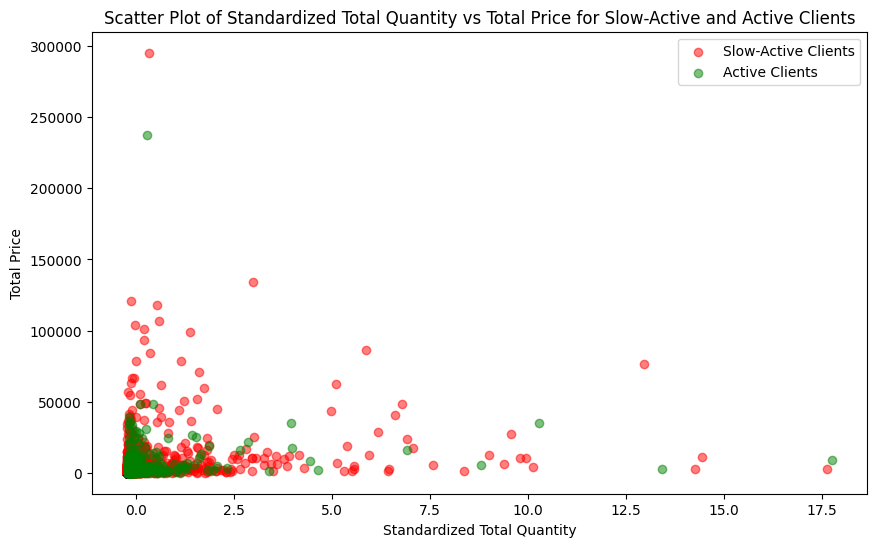

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(slow_active_agg['Quantity_std'], slow_active_agg['Price'], color='red', label='Slow-Active Clients', alpha=0.5)
plt.scatter(active_agg['Quantity_std'], active_agg['Price'], color='green', label='Active Clients', alpha=0.5)
plt.xlabel('Standardized Total Quantity')
plt.ylabel('Total Price')
plt.title('Scatter Plot of Standardized Total Quantity vs Total Price for Slow-Active and Active Clients')
plt.legend()
plt.show()

In [71]:
# Filter data for buy and sell orders
buy_orders = process[process['Order Type'] == 0]
sell_orders = process[process['Order Type'] == 1]

# Aggregate buy and sell orders for slow-active and active clients
slow_active_buy_agg = slow_active_data[slow_active_data['Order Type'] == 0].groupby('Client ID').size().reset_index(name='Buy Count')
slow_active_sell_agg = slow_active_data[slow_active_data['Order Type'] == 1].groupby('Client ID').size().reset_index(name='Sell Count')
active_buy_agg = active_data[active_data['Order Type'] == 0].groupby('Client ID').size().reset_index(name='Buy Count')
active_sell_agg = active_data[active_data['Order Type'] == 1].groupby('Client ID').size().reset_index(name='Sell Count')

In [72]:
# Merge buy and sell counts for slow-active and active clients
slow_active_agg = slow_active_buy_agg.merge(slow_active_sell_agg, on='Client ID', how='outer').fillna(0)
active_agg = active_buy_agg.merge(active_sell_agg, on='Client ID', how='outer').fillna(0)

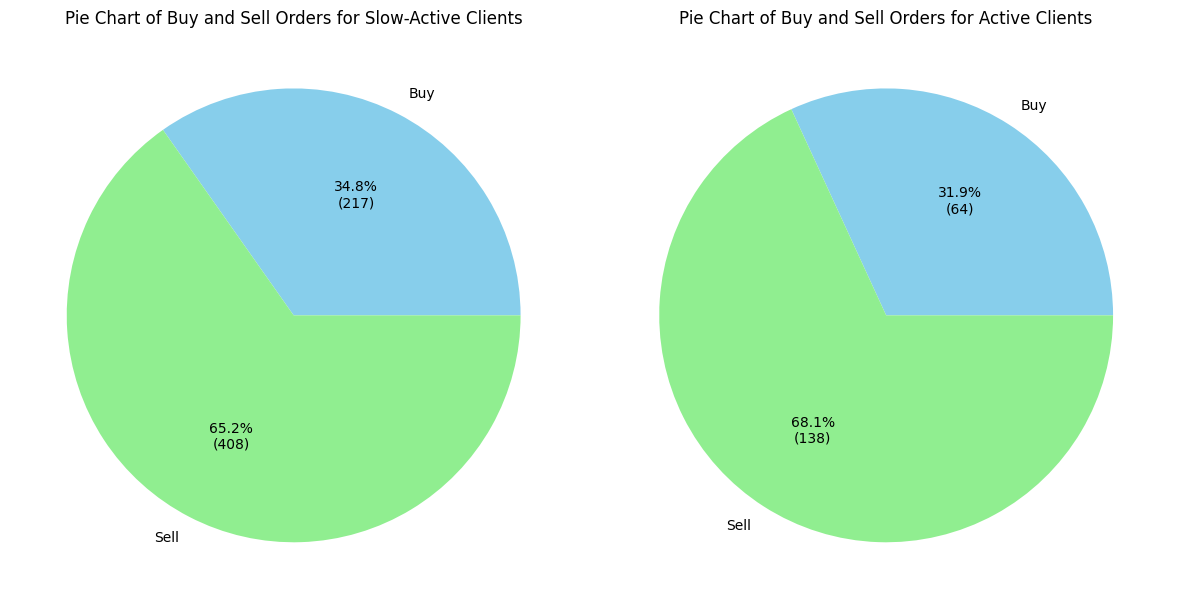

In [73]:
slow_active_buy_total = slow_active_agg['Buy Count'].sum()
slow_active_sell_total = slow_active_agg['Sell Count'].sum()
active_buy_total = active_agg['Buy Count'].sum()
active_sell_total = active_agg['Sell Count'].sum()

# Pie chart for slow-active clients
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sizes = [slow_active_buy_total, slow_active_sell_total]
labels = ['Buy', 'Sell']
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct / 100 * sum(sizes))})", colors=['skyblue', 'lightgreen'])
plt.title('Pie Chart of Buy and Sell Orders for Slow-Active Clients')

# Pie chart for active clients
plt.subplot(1, 2, 2)
sizes = [active_buy_total, active_sell_total]
plt.pie(sizes, labels=labels, autopct=lambda pct: f"{pct:.1f}%\n({int(pct / 100 * sum(sizes))})", colors=['skyblue', 'lightgreen'])
plt.title('Pie Chart of Buy and Sell Orders for Active Clients')

plt.tight_layout()
plt.show()

# ROI


In this section, we analyze the Return on Investment (ROI) for different client groups and over time. We use scatter plots to visualize ROI for slow-active and active clients based on their Client IDs, as well as to track ROI progression over time in months. These visualizations help us understand how client investments perform across various time frames and client segments.

In [74]:
buy_transactions = process[process['Order Type'] == 0]
sell_transactions = process[process['Order Type'] == 1]

In [76]:
slow_active_buy_transactions = buy_transactions[buy_transactions['Client ID'].isin(slow_active_clients)]
slow_active_sell_transactions = sell_transactions[sell_transactions['Client ID'].isin(slow_active_clients)]
active_buy_transactions = buy_transactions[buy_transactions['Client ID'].isin(active_clients)]
active_sell_transactions = sell_transactions[sell_transactions['Client ID'].isin(active_clients)]

In [ ]:
# Calculate total amount spent on buying and received from selling for each client-stock combination
slow_active_buy_grouped = slow_active_buy_transactions.groupby(['Client ID', 'Security ID'])
slow_active_sell_grouped = slow_active_sell_transactions.groupby(['Client ID', 'Security ID'])
active_buy_grouped = active_buy_transactions.groupby(['Client ID', 'Security ID'])
active_sell_grouped = active_sell_transactions.groupby(['Client ID', 'Security ID'])

In [ ]:
slow_active_buy_grouped.head()

,Order ID,Account ID,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Execution Status,Price,...,Client ID,Gender,Risk Rate,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,OpenDate,BirthDate,last order date
12719,7474,4476,1,0,2024-01-02 10:27:04,2,1,0,0,73.000,...,3067,1,3,0,0.0,0,0,2022-12-22,1946-08-13,2024-02-20 11:04:15
12720,10406,4476,1,0,2023-12-31 13:45:34,2,0,0,1,72.000,...,3067,1,3,0,0.0,0,0,2022-12-22,1946-08-13,2024-02-20 11:04:15
12721,38838,4476,79,0,2024-02-20 11:04:15,2,1,0,0,2.600,...,3067,1,3,0,0.0,0,0,2022-12-22,1946-08-13,2024-02-20 11:04:15
12722,75570,4476,79,0,2024-02-12 12:31:34,2,1,0,0,2.430,...,3067,1,3,0,0.0,0,0,2022-12-22,1946-08-13,2024-02-20 11:04:15
12723,82205,4476,79,0,2023-12-28 11:38:40,2,0,0,1,1.180,...,3067,1,3,0,0.0,0,0,2022-12-22,1946-08-13,2024-02-20 11:04:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987933,1986485,13481,112,0,2024-03-10 12:53:56,2,1,0,0,5.340,...,9101,1,3,0,0.0,0,0,2024-02-25,1976-10-02,2024-03-10 13:07:37
1987934,1986656,13481,112,0,2024-03-10 13:07:37,2,1,0,0,5.260,...,9101,1,3,0,0.0,0,0,2024-02-25,1976-10-02,2024-03-10 13:07:37
1987935,1984354,7372,26,0,2024-03-10 10:52:17,3,1,0,0,0.334,...,5283,1,1,0,0.0,0,0,2012-04-22,1959-11-12,2024-03-10 10:52:17
1987940,1985837,13221,44,0,2024-03-10 12:13:32,2,1,0,0,14.700,...,8949,1,3,0,0.0,0,0,2024-02-26,1988-03-10,2024-03-10 13:48:20


In [ ]:
slow_active_total_spent = slow_active_buy_grouped.apply(lambda x: (x['Executed Quantity'] * x['Price']).sum())
slow_active_total_received = slow_active_sell_grouped.apply(lambda x: (x['Executed Quantity'] * x['Price']).sum())
active_total_spent = active_buy_grouped.apply(lambda x: (x['Executed Quantity'] * x['Price']).sum())
active_total_received = active_sell_grouped.apply(lambda x: (x['Executed Quantity'] * x['Price']).sum())

In [ ]:
slow_active_total_spent.head(20)

,,Order ID,Account ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,...,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate
Client ID,Security ID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
slow_active_total_received.head(20)

Client.ID Security ID
1 46 650.760
 50 417.326
 114 134.000
 139 1035.580
 150 1296.900
 171 802.620
2 66 19800.000
 152 9047.500
3 1 258000.000
 2 455760.000
 8 216216.000
 12 1787075.550
 15 624390.000
 19 1103979.000
 22 276750.000
 37 218088.000
 42 212160.000
 54 534750.000
 64 222300.000
 66 1192630.000
dtype: float64

In [ ]:
# Calculate ROI for each client-stock combination
slow_active_roi = ((slow_active_total_received - slow_active_total_spent) / slow_active_total_spent)*100
active_roi = ((active_total_received - active_total_spent) / active_total_spent)*100

In [ ]:
active_roi.dropna(inplace=True)
active_roi.shape

(48796,)

In [ ]:
slow_active_roi.dropna(inplace=True)
slow_active_roi.shape

(18489,)

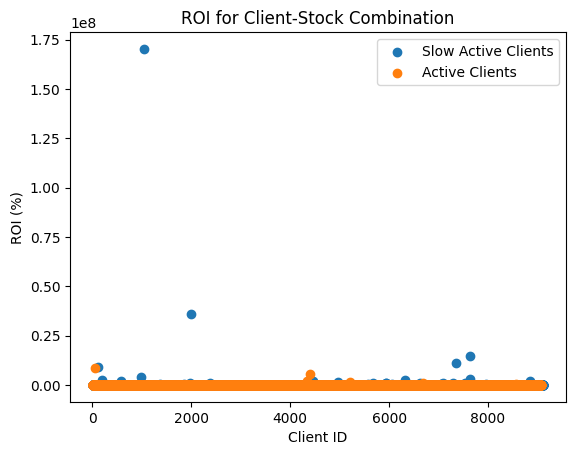

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(slow_active_roi.index.get_level_values('Client ID'), slow_active_roi.values, label='Slow Active Clients')

# Plot active clients
plt.scatter(active_roi.index.get_level_values('Client ID'), active_roi.values, label='Active Clients')

# Set labels and title
plt.xlabel('Client ID')
plt.ylabel('ROI (%)')
plt.title('ROI for Client-Stock Combination')
plt.legend()

# Show plot
plt.show()

ROI OVER TIME

In [ ]:
buy_transactions = data[data['Order Type'] == 0]
sell_transactions = data[data['Order Type'] == 1]
# Group buy and sell transactions by Client ID and Security ID
buy_grouped = buy_transactions.groupby(['Client ID', 'Security ID'])
sell_grouped = sell_transactions.groupby(['Client ID', 'Security ID'])
# Calculate buy and sell times for each Client ID and Security ID
buy_times = buy_grouped['Order Time'].min()
sell_times = sell_grouped['Order Time'].max()

In [ ]:
buy_times = buy_times.reset_index()
sell_times = sell_times.reset_index()
merged_times = pd.merge(buy_times, sell_times, on=['Client ID', 'Security ID'], suffixes=('_buy', '_sell'))
# Calculate the time difference between buy and sell for each Client ID and Security ID
time_diff = merged_times['Order Time_sell'] - merged_times['Order Time_buy']
time_diff = time_diff[time_diff >= pd.Timedelta(0)]
time_diff_years = time_diff / pd.Timedelta(days=365)

In [ ]:
import numpy as np
total_roi = np.concatenate([active_roi, slow_active_roi])

# Display the shape of the combined ROI array
total_roi.shape

(96257,)

NEW ROI COLUMN

In [ ]:
buy_grouped = buy_transactions.groupby(['Client.ID', 'Security ID']).apply(lambda x: (x['Quantity'] * x['Price']).sum())
sell_grouped = sell_transactions.groupby(['Client.ID', 'Security ID']).apply(lambda x: (x['Quantity'] * x['Price']).sum())

In [ ]:
sell_grouped.head()

Client.ID Security ID
1 46 650.760
 50 417.326
 114 134.000
 139 1035.580
 150 1296.900
dtype: float64

In [ ]:
roi = (sell_grouped - buy_grouped) / buy_grouped
roi_df = roi.reset_index()
roi_df.fillna(0, inplace=True)

In [ ]:
# Group buy and sell transactions by Client ID and Security ID
buy_grouped = buy_transactions.groupby(['Client.ID', 'Security ID'])
sell_grouped = sell_transactions.groupby(['Client.ID', 'Security ID'])

# Calculate buy and sell times for each Client ID and Security ID
buy_times = buy_grouped['Order Time'].min()
sell_times = sell_grouped['Order Time'].max()

# Reset index to make Client ID and Security ID columns
buy_times = buy_times.reset_index()
sell_times = sell_times.reset_index()

# Merge buy and sell times on Client ID and Security ID
merged_times = pd.merge(buy_times, sell_times, on=['Client.ID', 'Security ID'], suffixes=('_buy', '_sell'))

# Calculate the time difference between buy and sell for each Client ID and Security ID
time_diff = merged_times['Order Time_sell'] - merged_times['Order Time_buy']

# Print the first few rows to check
print(time_diff.shape)

(96257,)


In [ ]:
time_diff_months = time_diff.dt.days / 30

In [ ]:
import matplotlib.pyplot as plt

# Plot ROI over time (months)
plt.scatter(time_diff_months, total_roi)
plt.xlabel('Time in Months')
plt.ylabel('ROI (%)')
plt.title('ROI over Time')
plt.xlim(left=0)
plt.show()

# Churn visualization

In this section, we examine the churn rates and their distribution among different client groups and risk categories. Various visualizations, including bar charts, pie charts, and box plots, are employed to depict the churn rate for slow-active and active clients, churn rate by risk rate, overall churn status, and the distribution of trade volumes by churn status. These analyses provide insights into the characteristics and behaviors of clients who are more likely to churn.

In [77]:
client_activity_count = process['orders count']

In [78]:
client_activity_count.describe()

count    5827.000000
mean      133.758023
std       404.219086
min         1.000000
25%         4.000000
50%        21.000000
75%        92.000000
max      9141.000000
Name: orders count, dtype: float64

In [79]:
process['Client ID'].nunique()

5827

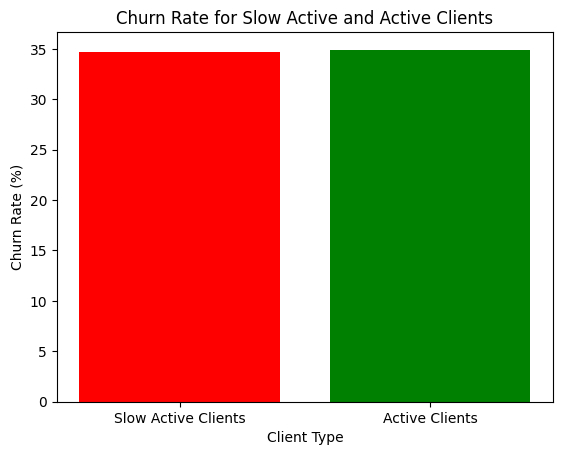

In [82]:
slow_active_clients = client_activity_count[client_activity_count <= np.percentile(client_activity_count, 75)].index
active_clients = client_activity_count[client_activity_count > np.percentile(client_activity_count, 75)].index
slow_active_data = process[process['Client ID'].isin(slow_active_clients)]
active_data = process[process['Client ID'].isin(active_clients)]

import matplotlib.pyplot as plt

# Calculate churn rate for slow active and active clients
slow_active_churn_rate = (slow_active_data['Churn'] == 1).mean() * 100
active_churn_rate = (active_data['Churn'] == 1).mean() * 100

# Plot churn rate
plt.bar(['Slow Active Clients', 'Active Clients'], [slow_active_churn_rate, active_churn_rate], color=['red', 'green'])

# Set labels and title
plt.xlabel('Client Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate for Slow Active and Active Clients')

# Show plot
plt.show()

This plot could reject the hypothesis that churn could be identified if the client is dormant. As we have seen the scatter plot for ROI, the slow active clients, who place transactions over a long period of time have the highest ROI hence they aren't classified as churned customers but rather Slow active clients who are opportunitists

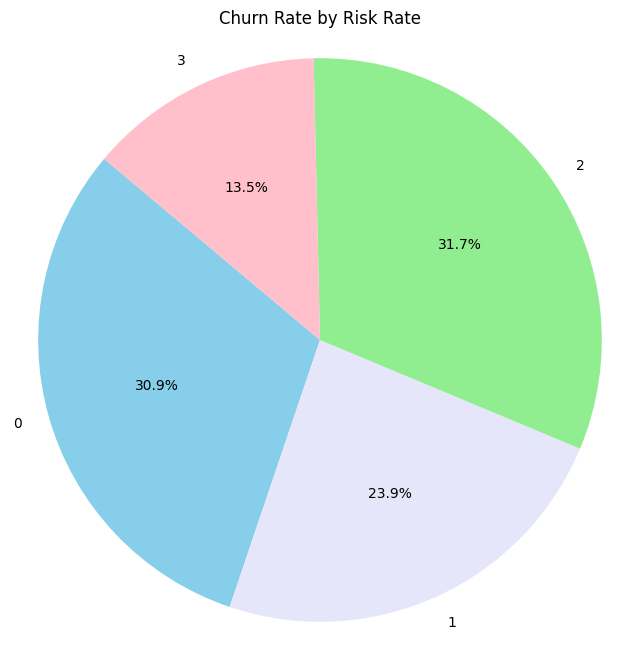

In [83]:
import matplotlib.pyplot as plt

# Calculate churn rates for each risk rate category
risk_rate_churn = process.groupby('Risk Rate')['Churn'].mean()
colors = ['skyblue', 'lavender', 'lightgreen', 'pink']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_rate_churn, labels=risk_rate_churn.index, autopct='%1.1f%%', startangle=140, colors= colors)
plt.title('Churn Rate by Risk Rate')
plt.axis('equal')
plt.show()

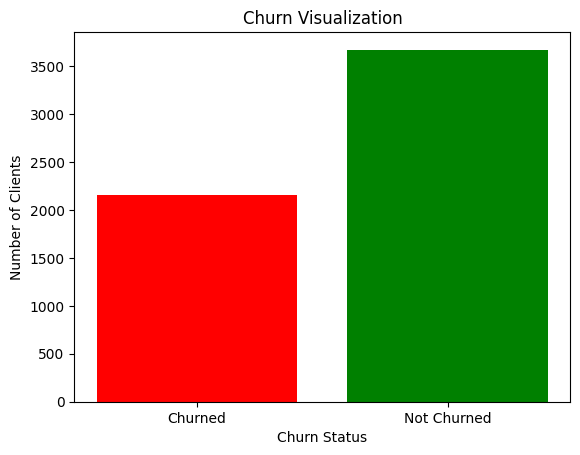

In [84]:
import matplotlib.pyplot as plt

# Create a bar chart of churned and non-churned clients
churned = process[process['Churn'] == 1].shape[0]
not_churned = process[process['Churn'] == 0].shape[0]
labels = ['Churned', 'Not Churned']
values = [churned, not_churned]

plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Clients')
plt.title('Churn Visualization')
plt.show()


<ipython-input-86-adcb04a6ae5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_data['Volume'] = active_data['Executed Quantity'] * active_data['Price']
<ipython-input-86-adcb04a6ae5d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Volume', data=volume_per_client, palette='coolwarm')


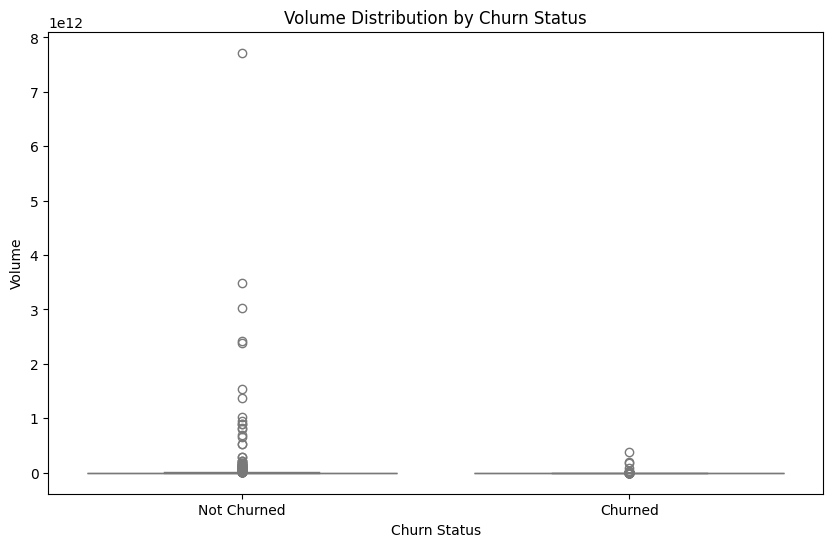

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate volume
active_data['Volume'] = active_data['Executed Quantity'] * active_data['Price']

# Group by Client ID and aggregate to get the total volume for each client
volume_per_client = active_data.groupby('Client ID')['Volume'].sum().reset_index()

# Merge the volume_per_client with Churn_data to retain the Churn status
volume_per_client = volume_per_client.merge(active_data[['Client ID', 'Churn']].drop_duplicates(), on='Client ID')

# Plot the box plot of volume grouped by Churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Volume', data=volume_per_client, palette='coolwarm')
plt.title('Volume Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Volume')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


<ipython-input-87-6e6b6861ec13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['Executed Quantity'] * df['Price']
<ipython-input-87-6e6b6861ec13>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Volume', data=df, palette='coolwarm')


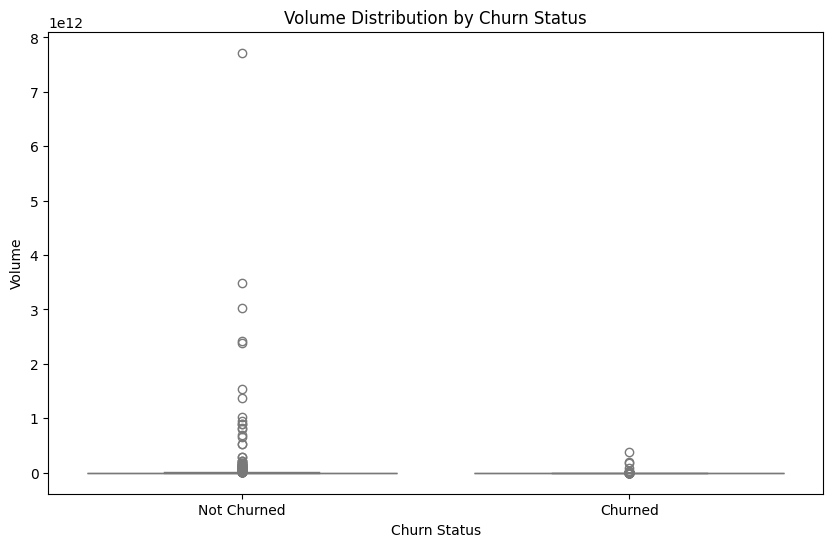

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_volume_boxplot(df):
    # Calculate volume
    df['Volume'] = df['Executed Quantity'] * df['Price']

    # Filter data based on churn status
    churned = df[df['Churn'] == 1]
    not_churned = df[df['Churn'] == 0]

    # Plot the box plot of volume for churned and not churned clients
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y='Volume', data=df, palette='coolwarm')
    plt.title('Volume Distribution by Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel('Volume')
    plt.xticks([0, 1], ['Not Churned', 'Churned'])
    plt.show()

plot_volume_boxplot(active_data)


<ipython-input-108-338c0a10641c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-338c0a10641c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



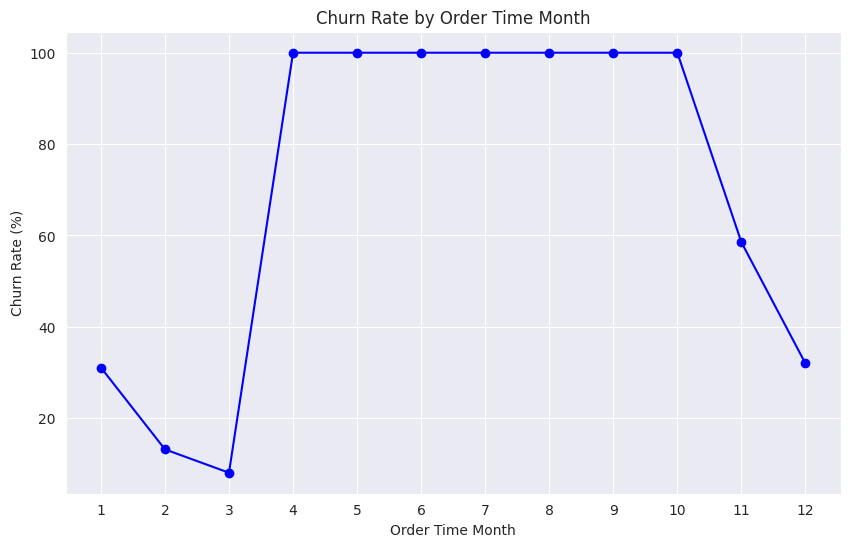

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that 'Order Time' is in datetime format
active_data['Order Time'] = pd.to_datetime(active_data['Order Time'])

# Extract month from 'Order Time'
active_data['Order Time_month'] = active_data['Order Time'].dt.month

# Calculate churn rate by month
monthly_churn_rate = active_data.groupby('Order Time_month')['Churn'].mean() * 100

# Plot the churn rate by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_churn_rate.index, monthly_churn_rate.values, marker='o', linestyle='-', color='b')
plt.xlabel('Order Time Month')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Order Time Month')
plt.xticks(monthly_churn_rate.index)
plt.grid(True)
plt.show()

# RFM Analysis

In this section, we use RFM (Recency, Frequency, Monetary) analysis to segment our clients. The bar chart below shows the count of clients in each RFM segment, providing insights into where each client lies based on their purchasing behavior. This visualization helps identify which segments have the most clients and can be used to tailor marketing strategies for different client groups.

In [88]:
import datetime as dt
today_date = process['Order Time'].max()

In [89]:
data = process.copy()

In [90]:
data['recency'] = today_date - data['last order date']

In [92]:
frequency = data.groupby('Client ID').size().reset_index(name='frequency')

In [94]:
data = pd.merge(data, frequency, on='Client ID', how='left')

In [97]:
filtered_data_0 = data[data['Order Type'] == 0].copy()
filtered_data_0.loc[:, 'total_spent'] = filtered_data_0['Price'] * filtered_data_0['Executed Quantity']
monetary_0 = filtered_data_0.groupby('Client ID')['total_spent'].sum().reset_index()
filtered_data_1 = data[data['Order Type'] == 1].copy()
filtered_data_1['total_spent'] = 0
combined_data = pd.concat([filtered_data_0, filtered_data_1])
monetary = combined_data.groupby('Client ID')['total_spent'].sum().reset_index()

In [99]:
data = pd.merge(data, monetary, on='Client ID', how='left')

In [100]:
df_rfm = data.groupby('Client ID').agg(
    recency=('recency', 'min'),
    frequency=('frequency', 'max'),
    monetary=('total_spent', 'max')
)
df_rfm.reset_index(inplace=True)

In [101]:
df_rfm.head()

,Client ID,recency,frequency,monetary
0,0,508 days 02:05:44,1,29040.0
1,1,543 days 01:32:52,1,0.0
2,2,11 days 03:23:15,1,NaN
3,3,0 days 01:57:14,1,NaN
4,4,13 days 01:42:15,1,NaN


In [102]:
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Client ID,5827.0,4647.330874,2634.317996,0.0,2379.5,4637.0,6964.5,9122.0
recency,5827,161 days 14:48:20.566500772,227 days 17:51:33.162826024,0 days 00:00:00,4 days 04:20:46.500000,33 days 00:27:56,259 days 02:01:55,798 days 03:57:00
frequency,5827.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
monetary,1342.0,3359701.274879,51044248.44786,0.0,0.0,0.0,5475.728,1364728597.83


In [103]:
# Calculate recency score based on quantiles, assigning labels from 1 to 5 (1 being lowest recency)
df_rfm["recency_score"] = pd.qcut(df_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest frequency)
df_rfm["frequency_score"] = pd.qcut(df_rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
df_rfm.head()

,Client ID,recency,frequency,monetary,recency_score,frequency_score
0,0,508 days 02:05:44,1,29040.0,1,1
1,1,543 days 01:32:52,1,0.0,1,1
2,2,11 days 03:23:15,1,NaN,4,1
3,3,0 days 01:57:14,1,NaN,5,1
4,4,13 days 01:42:15,1,NaN,4,1


In [104]:
# Combine recency and frequency scores to create RFM segment
df_rfm['segment'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm.head()

,Client ID,recency,frequency,monetary,recency_score,frequency_score,segment
0,0,508 days 02:05:44,1,29040.0,1,1,11
1,1,543 days 01:32:52,1,0.0,1,1,11
2,2,11 days 03:23:15,1,NaN,4,1,41
3,3,0 days 01:57:14,1,NaN,5,1,51
4,4,13 days 01:42:15,1,NaN,4,1,41


In [105]:
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_risk',
r'[1-2]5': 'cant_lose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal_customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]': 'champions'
    }

df_rfm['segment'] = df_rfm['segment'].replace(seg_map, regex=True)

df_rfm = df_rfm[["recency", "frequency", "monetary", "segment"]]

df_rfm.index = df_rfm.index.astype(int)
df_rfm.head()

,recency,frequency,monetary,segment
0,508 days 02:05:44,1,29040.0,hibernating
1,543 days 01:32:52,1,0.0,hibernating
2,11 days 03:23:15,1,NaN,promising
3,0 days 01:57:14,1,NaN,new_customers
4,13 days 01:42:15,1,NaN,promising


In [106]:
import plotly.express as px
segments = df_rfm['segment'].value_counts()

fig = px.bar(x=segments.index,
             y=segments.values,
             color=segments.index,
             text=segments.values,
             title="RFM Segments",
             labels={'x': 'Product', 'y': 'Count'})

fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)

# Show the plot
fig.show()

In [ ]:
df_rfm[["segment","recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count","sum"])

recency 
 frequency 
 monetary 
 
 
 
 mean 
 count 
 sum 
 mean 
 count 
 sum 
 mean 
 count 
 sum 
 
 
 segment 
 
 
 
 
 
 
 
 
 
 
 
 
 
 about_to_sleep 
 82 days 02:51:44.587155963 
 654 
 53706 days 00:00:00 
 6.948012 
 654 
 4544 
 1.220967e+06 
 654 
 7.985126e+08 
 
 
 at_risk 
 357 days 13:11:07.258601552 
 901 
 -104856 days +00:50:52.580896768 
 65.023307 
 901 
 58586 
 2.051156e+06 
 901 
 1.848091e+09 
 
 
 cant_lose 
 313 days 11:24:11.933701656 
 181 
 56739 days 00:00:00 
 621.447514 
 181 
 112482 
 1.698152e+07 
 181 
 3.073655e+09 
 
 
 champions 
 44 days 11:59:32.218649517 
 1555 
 69197 days 00:00:00 
 833.357556 
 1555 
 1295871 
 2.461701e+07 
 1555 
 3.827945e+10 
 
 
 hibernating 
 462 days 00:52:07.768313456 
 2348 
 17341 days 02:07:11.452241920 
 5.316865 
 2348 
 12484 
 5.552369e+05 
 2348 
 1.303696e+09 
 
 
 loyal_customers 
 60 days 13:00:52.478134111 
 1372 
 83064 days 00:00:00 
 326.509475 
 1372 
 447971 
 1.033576e+07 
 1372 
 1.418066e+10 
 
 
 need_attention 
 78 days 12:26:19.354838710 
 465 
 36511 days 00:00:00 
 37.086022 
 465 
 17245 
 1.524710e+06 
 465 
 7.089900e+08 
 
 
 new_customers 
 45 days 11:07:19.024390244 
 41 
 1864 days 00:00:00 
 2.463415 
 41 
 101 
 2.762527e+05 
 41 
 1.132636e+07 
 
 
 potential_loyalists 
 48 days 16:15:29.032258064 
 992 
 48288 days 00:00:00 
 29.785282 
 992 
 29547 
 2.931970e+06 
 992 
 2.908515e+09 
 
 
 promising 
 51 days 20:49:24.705882353 
 68 
 3527 days 00:00:00 
 2.147059 
 68 
 146 
 1.982917e+05 
 68 
 1.348384e+07

# **Modeling**

*   # Feature Selection
*   # Training with XGboost
*   # Save results



**Feature Selection**

Firstly I will remove 'Last Order Date' to avoid data leakage and convert all datetime features to a simpler form for the training part.
Then I will plot correlation heatmaps to identify multicollinear features and create a function to remove features with high multicollinearity for model validation.


**Training**

I will be using **XGBClassifier** for its ease of use and code simplification.

The XGBClassifier class simplifies the process of setting up and training the model compared to using the lower-level xgb.train method. It follows the familiar scikit-learn interface, making it easier to integrate with other scikit-learn tools like pipelines, cross-validation, and grid search.
The code becomes more concise and readable. We don’t need to manually create DMatrix objects or handle training and prediction separately.

I will start by doing **cross-validation** for hyperparameter tuning before fitting the final model.

The idea is to use cross-validation to find the best set of hyperparameters by optimizing **Recall**, and then use those hyperparameters to fit the final model on the entire training dataset. This ensures that the final model is trained with the best possible settings.

optimizing for recall is justified when the focus is on ensuring that all positive instances are correctly identified, especially in situations where the cost of missing positives is high.

In [109]:
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Client ID            5827 non-null   int64         
 1   Order Type           5827 non-null   float64       
 2   Order Time           5827 non-null   datetime64[ns]
 3   Order Via            5827 non-null   int64         
 4   Is Completed         5827 non-null   float64       
 5   Is Canceled          5827 non-null   float64       
 6   Price                5827 non-null   float64       
 7   Sector Name          5827 non-null   int64         
 8   Executed Quantity    5827 non-null   int64         
 9   Gender               5827 non-null   int64         
 10  Risk Rate            5827 non-null   int64         
 11  Is Closed            5827 non-null   float64       
 12  Is Dormant           5827 non-null   float64       
 13  Is Client Suspended  5827 non-nul

In [110]:
process.head()

,Client ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Price,Sector Name,Executed Quantity,Gender,...,Is Dormant,Is Client Suspended,OpenDate,BirthDate,last order date,orders count,Churn,RecencyScore,FrequencyScore,MonetaryScore
0,0,0.000000,2022-10-19 12:24:04,0,1.0,0.0,2.420,0,12000,1,...,0.0,0.0,2014-02-16,1990-07-27,2022-10-19 12:24:04,2,1,3,0,0
1,1,1.000000,2022-09-14 12:56:56,3,1.0,0.0,12.715,9,4347,0,...,1.0,0.0,2014-02-16,1963-10-22,2022-09-14 12:56:56,6,1,3,1,0
2,2,0.176471,2024-02-28 11:06:33,2,1.0,0.0,143.336,9,123895,1,...,0.0,0.0,2014-02-17,1971-05-14,2024-02-28 11:06:33,17,0,1,2,1
3,3,0.468750,2024-03-10 12:32:34,2,1.0,0.0,4717.780,5,682538,1,...,0.0,0.0,2014-02-17,1953-01-14,2024-03-10 12:32:34,64,0,0,3,2
4,4,0.692308,2024-02-26 12:47:33,2,1.0,0.0,14.844,5,403500,1,...,0.0,0.0,2014-02-17,1976-06-09,2024-02-26 12:47:33,13,0,1,2,1


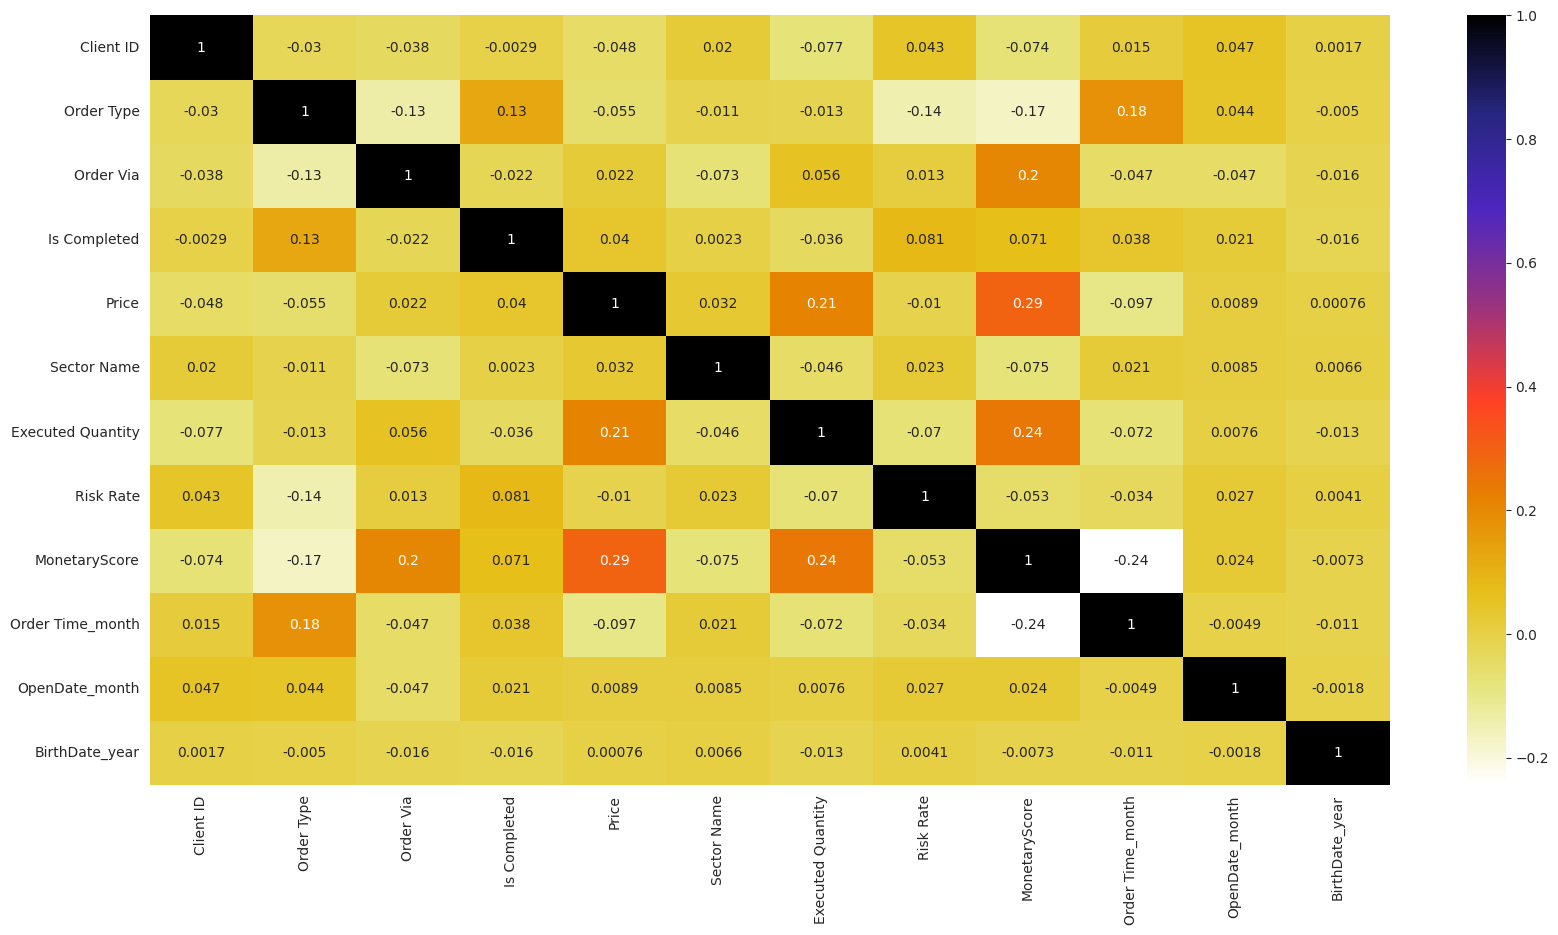

Number of unique clients in train data: 4078
Number of unique clients in test data: 1749
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.6}
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1079
           1       0.88      0.81      0.85       670

    accuracy                           0.89      1749
   macro avg       0.89      0.87      0.88      1749
weighted avg       0.89      0.89      0.89      1749



In [111]:
import TrainXGboost as xg
results = xg.full_xgboost(process, output_path='xgboost_results.pkl')

In [ ]:
import pickle

# Save the results to a pickle file
with open('xgboost_results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Load the results from the pickle file (for later use)
with open('xgboost_results.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

**Feature importance plot**

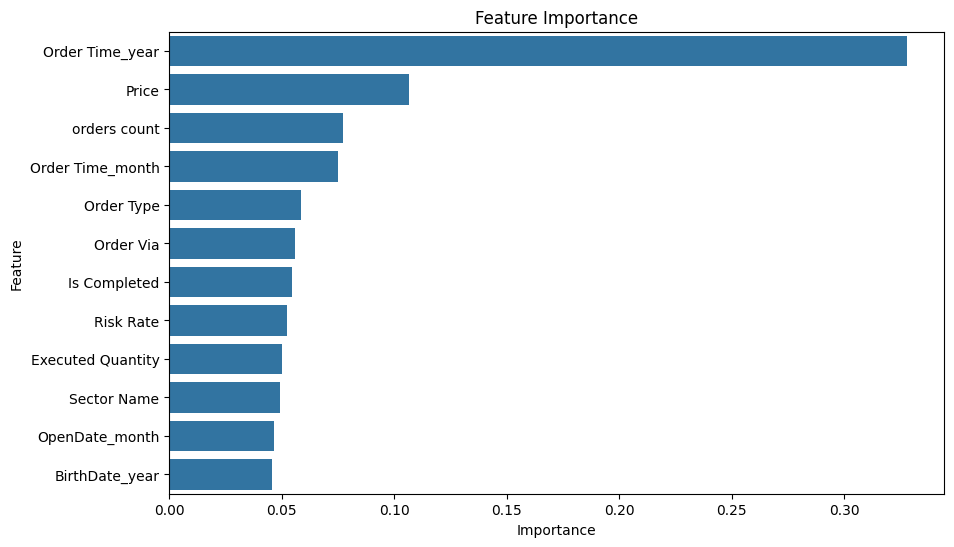

In [ ]:
xg.plot_feature_importances(loaded_results['best_model'], loaded_results['X_train'])

# Missclassified Churn

To gain better insights, we should compare the clients who are actual churn but classified as non-churn against those who are non-churn and correctly classified as non-churn. This will help identify what differentiates the misclassified churn clients from the correctly classified non-churn clients.

In [ ]:
 # Identify misclassified instances
misclassified = (y_pred == 0) & (y_test == 1)
misclassified_clients = test_data.loc[misclassified, 'Client ID']

 # to Analyze patterns
misclassified_data = test_data[test_data['Client ID'].isin(misclassified_clients)]
misclassified_data.head()

,Client ID,Order Type,Order Via,Is Completed,Price,Sector Name,Executed Quantity,Risk Rate,orders count,Churn,Order Time_year,Order Time_month,OpenDate_month,BirthDate_year
45,103,0.509141,2,0.989031,5992.149,5,3023773,1,1094,1,2022,1,11,1974
123,273,0.470588,2,1.000000,537.752,9,1055689,1,51,1,2023,7,2,1945
126,278,0.483516,2,0.939560,242.823,7,21060267,1,182,1,2022,3,4,2003
147,339,0.562500,2,0.937500,50.103,7,314720,1,16,1,2022,1,5,1985
155,352,0.432773,2,0.966387,2877.035,5,9260614,1,238,1,2022,10,3,1971


In [ ]:
misclassified_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 45 to 4598
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Client ID          214 non-null    int64  
 1   Order Type         214 non-null    float64
 2   Order Via          214 non-null    int64  
 3   Is Completed       214 non-null    float64
 4   Price              214 non-null    float64
 5   Sector Name        214 non-null    int64  
 6   Executed Quantity  214 non-null    int64  
 7   Risk Rate          214 non-null    int64  
 8   orders count       214 non-null    int64  
 9   Churn              214 non-null    int64  
 10  Order Time_year    214 non-null    int32  
 11  Order Time_month   214 non-null    int32  
 12  OpenDate_month     214 non-null    int32  
 13  BirthDate_year     214 non-null    int32  
dtypes: float64(3), int32(4), int64(7)
memory usage: 21.7 KB


In [ ]:
 # Identify correctly classified instances
correctly_classified = (y_pred == 0) & (y_test == 0)
correctly_classified_clients = test_data.loc[correctly_classified, 'Client ID']

 # to Analyze patterns
correctly_classified_data = test_data[test_data['Client ID'].isin(correctly_classified_clients)]
correctly_classified_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 4757
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Client ID          815 non-null    int64  
 1   Order Type         815 non-null    float64
 2   Order Via          815 non-null    int64  
 3   Is Completed       815 non-null    float64
 4   Price              815 non-null    float64
 5   Sector Name        815 non-null    int64  
 6   Executed Quantity  815 non-null    int64  
 7   Risk Rate          815 non-null    int64  
 8   orders count       815 non-null    int64  
 9   Churn              815 non-null    int64  
 10  Order Time_year    815 non-null    int32  
 11  Order Time_month   815 non-null    int32  
 12  OpenDate_month     815 non-null    int32  
 13  BirthDate_year     815 non-null    int32  
dtypes: float64(3), int32(4), int64(7)
memory usage: 82.8 KB


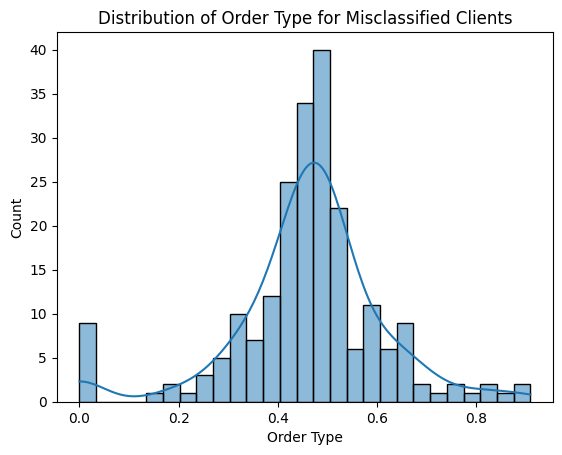

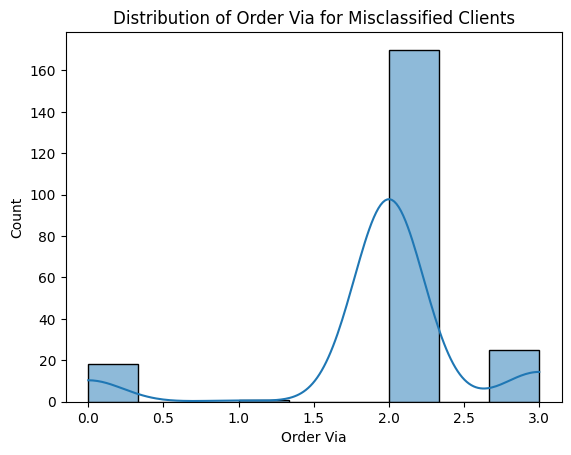

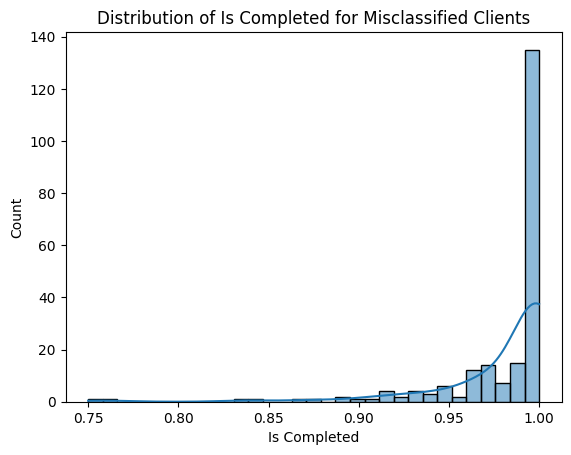

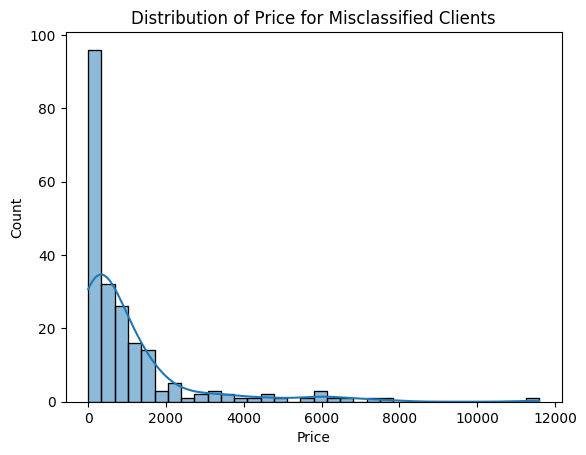

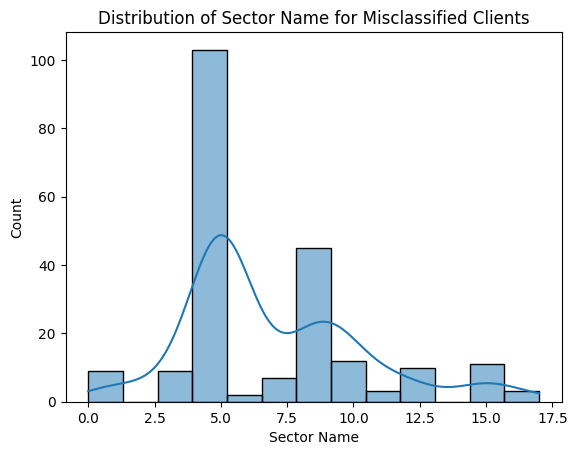

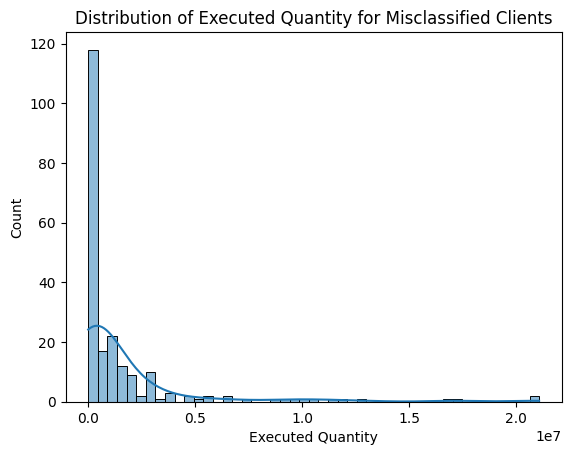

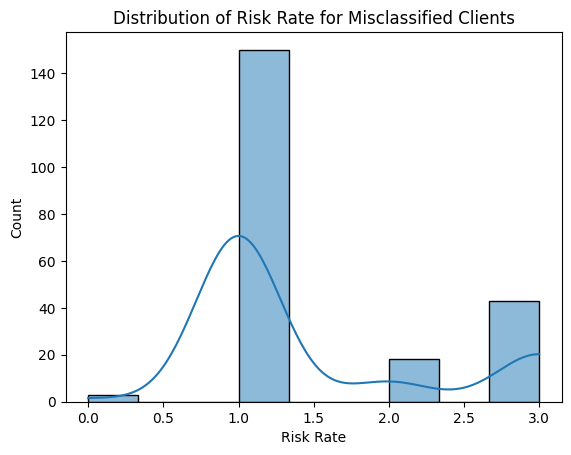

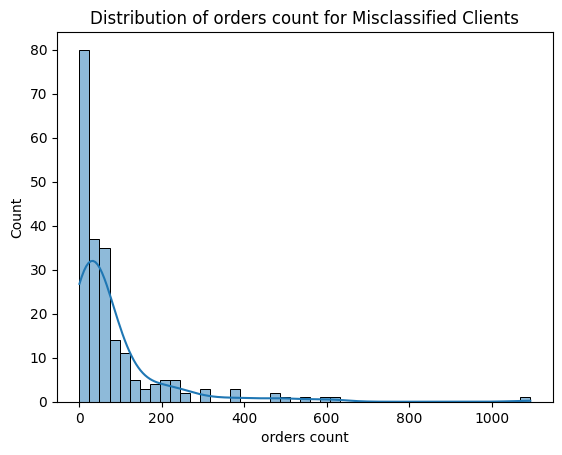

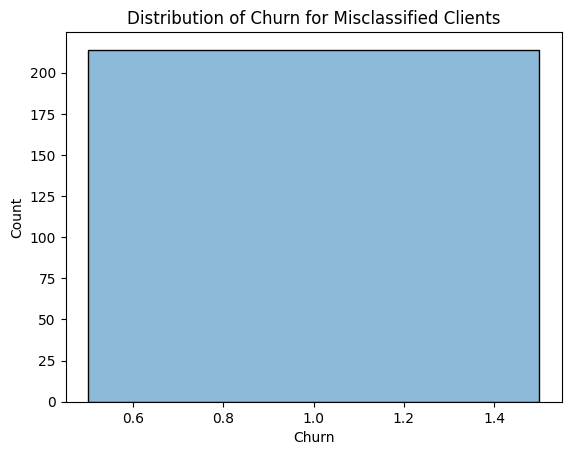

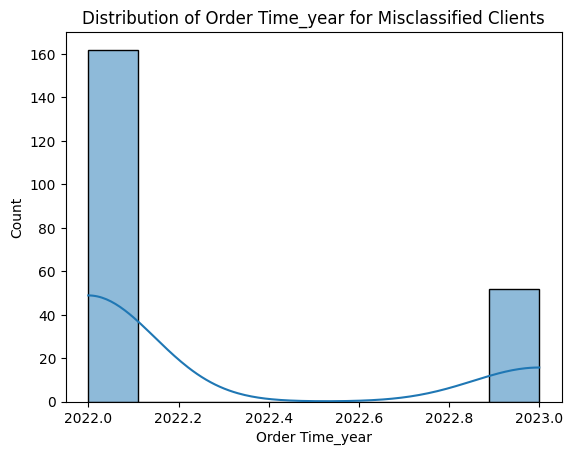

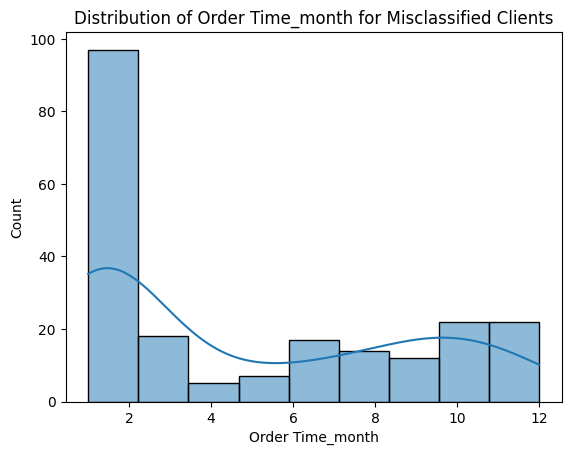

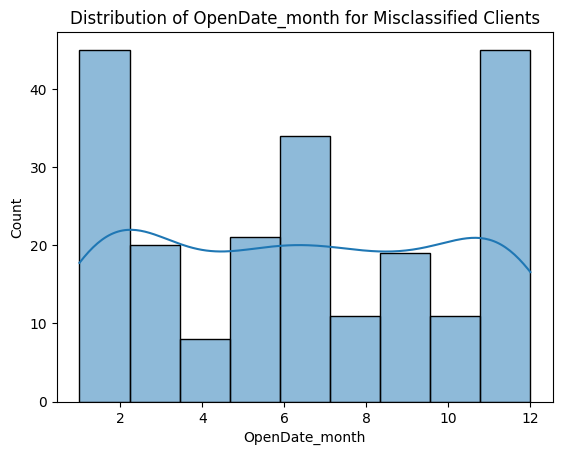

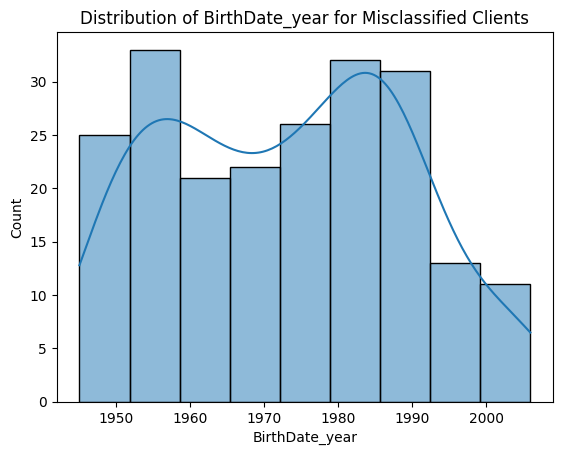

In [ ]:
# see patterns for these missclassified clients

for col in misclassified_data.columns:
  if col != 'Client ID':
    plt.figure()
    sns.histplot(misclassified_data[col], kde=True)
    plt.title(f'Distribution of {col} for Misclassified Clients')
    plt.show()

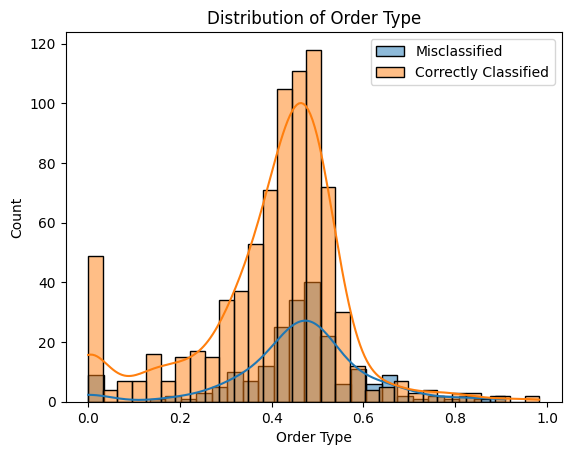

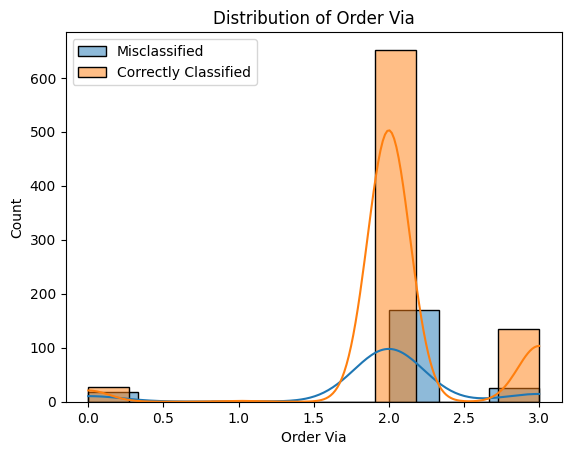

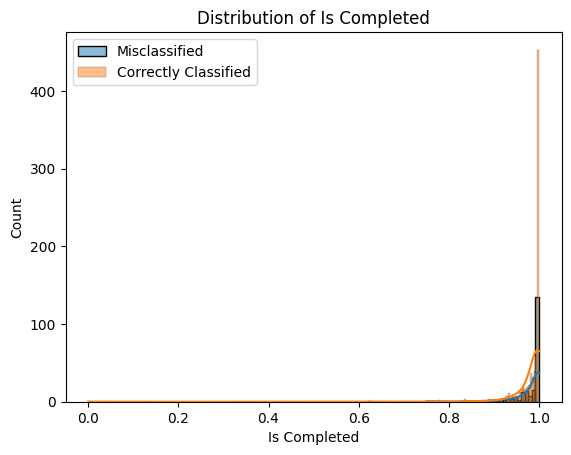

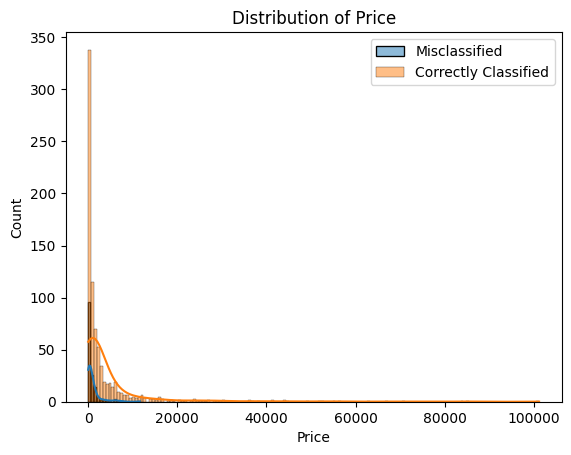

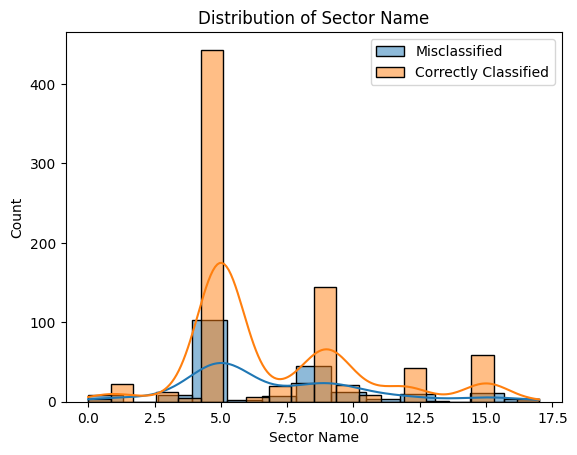

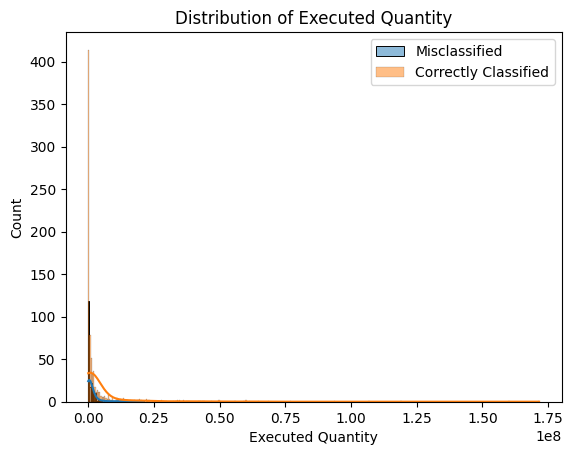

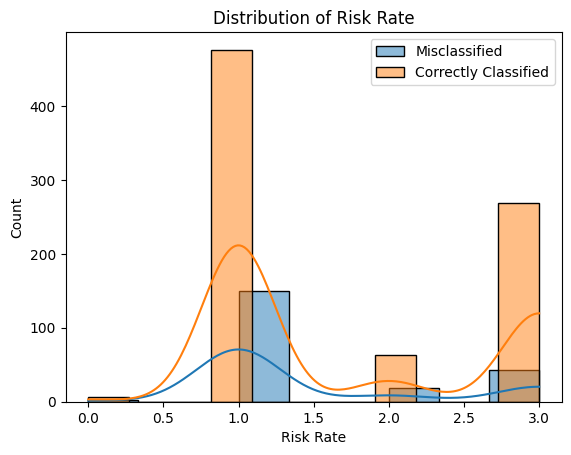

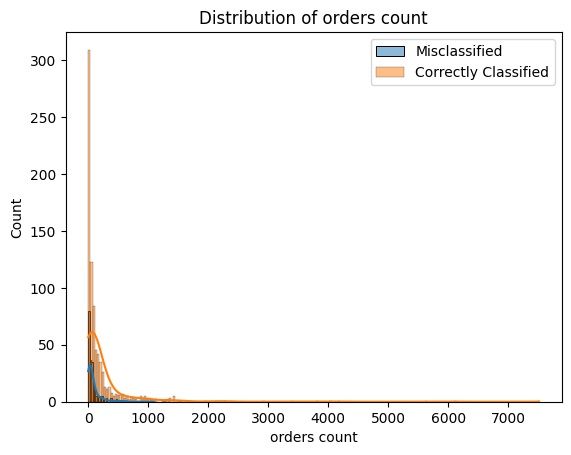

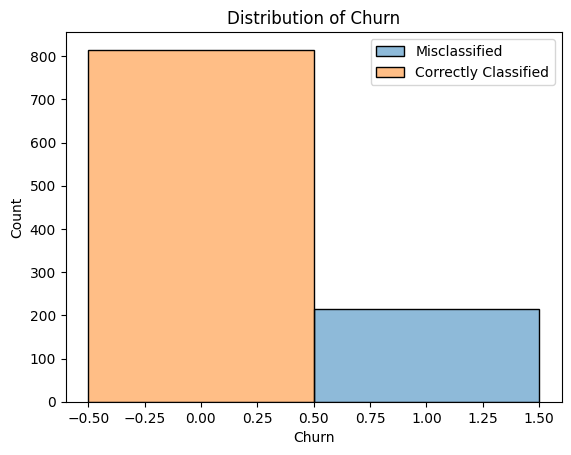

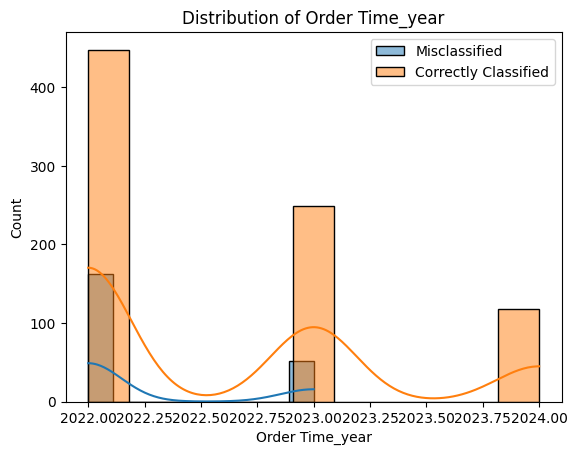

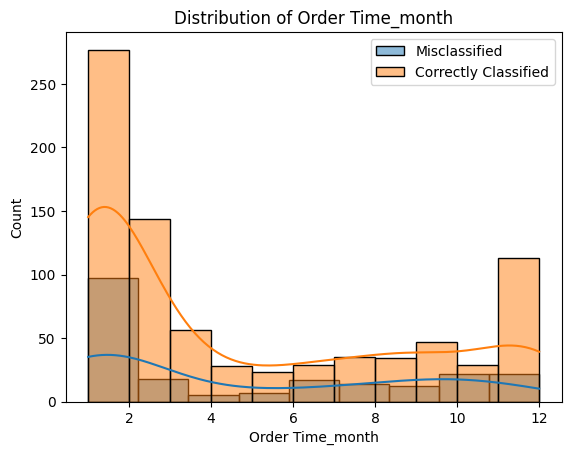

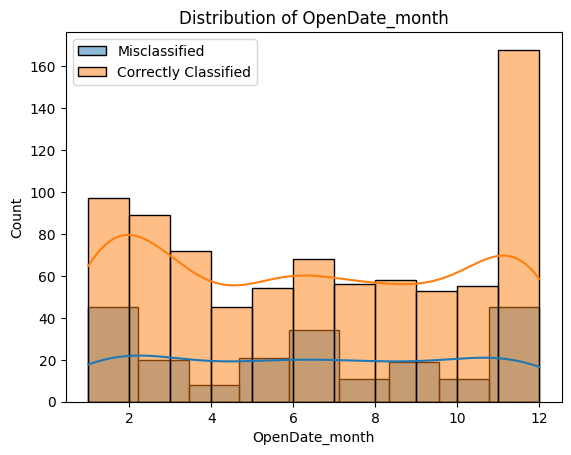

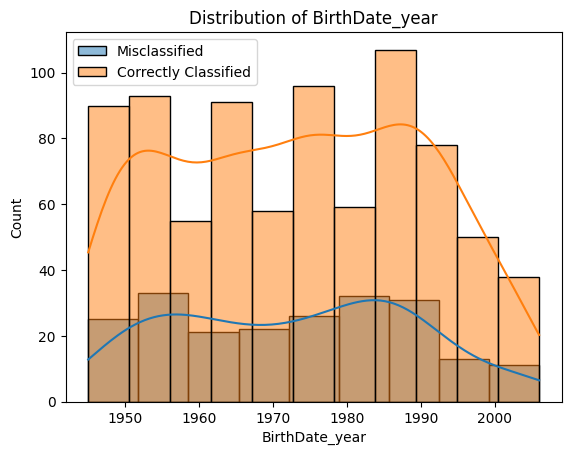

In [ ]:
# compare correctly classified with missclassified anf see differences

for col in misclassified_data.columns:
  if col != 'Client ID':
    plt.figure()
    sns.histplot(misclassified_data[col], kde=True, label='Misclassified')
    sns.histplot(correctly_classified_data[col], kde=True, label='Correctly Classified')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


# Validating with 'Test_data'

In [1]:
import pandas as pd
test_data = pd.read_csv('/content/test_data.csv')
test_data.head()

In [2]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627525 entries, 0 to 627524
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Order ID              627525 non-null  int64  
 1   Account ID            627525 non-null  int64  
 2   Market Key            627525 non-null  object 
 3   Security ID           627525 non-null  int64  
 4   Order Type            627525 non-null  object 
 5   Order Time            627525 non-null  object 
 6   Order Via             627525 non-null  object 
 7   Is Completed          627525 non-null  int64  
 8   Is Canceled           627525 non-null  int64  
 9   Execution Status      627524 non-null  object 
 10  Price                 627525 non-null  float64
 11  Sector Name           627525 non-null  object 
 12  Executed Quantity     627525 non-null  int64  
 13  Quantity              627525 non-null  int64  
 14  Client ID             627525 non-null  int64  
 15  

**Calling the full pipeline function defined**

In [3]:
import preprocessing as pp

In [ ]:
testing_data = pp.preprocess_data(test_data , test_data , 4 , 1)

In [ ]:
testing_data.head()

,Order ID,Account ID,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Execution Status,Price,...,Risk Rate,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,OpenDate,BirthDate,last order date,orders count,first order year
0,1,1196,0,1,2024-01-10 10:16:11,2,1,0,0,66.00,...,2,0,0.0,0,0,2014-04-07,1981-05-26,2024-03-10 10:08:51,674,2022
3,14237,1196,77,1,2022-08-21 10:25:11,2,1,0,0,17.50,...,2,0,0.0,0,0,2014-04-07,1981-05-26,2024-03-10 10:08:51,674,2022
5,15155,1196,5,0,2022-09-22 14:03:46,2,1,0,0,1.17,...,2,0,0.0,0,0,2014-04-07,1981-05-26,2024-03-10 10:08:51,674,2022
6,18867,1196,37,0,2023-01-09 13:42:43,2,1,0,0,21.99,...,2,0,0.0,0,0,2014-04-07,1981-05-26,2024-03-10 10:08:51,674,2022
8,21304,1196,176,0,2023-02-19 10:12:33,2,1,0,0,7.14,...,2,0,0.0,0,0,2014-04-07,1981-05-26,2024-03-10 10:08:51,674,2022


In [ ]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337328 entries, 0 to 627524
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Order ID              337328 non-null  int64         
 1   Account ID            337328 non-null  int64         
 2   Security ID           337328 non-null  int64         
 3   Order Type            337328 non-null  int64         
 4   Order Time            337328 non-null  datetime64[ns]
 5   Order Via             337328 non-null  int64         
 6   Is Completed          337328 non-null  int64         
 7   Is Canceled           337328 non-null  int64         
 8   Execution Status      337328 non-null  int64         
 9   Price                 337328 non-null  float64       
 10  Sector Name           337328 non-null  int64         
 11  Executed Quantity     337328 non-null  int64         
 12  Client ID             337328 non-null  int64         
 13  Gend

In [ ]:
# compare y_pred with y_actual
from sklearn.metrics import f1_score
y_actual = testing_data['Churn']
f1 = f1_score(y_actual, y_pred)
print("F1 Score:", f1)


F1 Score: 0.6960654912223146
